In [16]:
import random
from dataclasses import dataclass
import matplotlib.pyplot as plt
from collections import Counter

@dataclass
class Instance:
    x: int
    y: int
    label: str
        
def fuzz(std):
    return random.gauss(0, std)

def make_data(centers, n=20, std=0.7):
    data = []
    for x, y, label in centers:
        for _ in range(n):
            data.append(Instance(x + fuzz(std), y + fuzz(std), label))
    return data

def distance(i1, i2):
    return (sum([(i1.x - i2.x)**2, (i1.y - i2.y)**2]))**0.5

def most_votes(labels):
    votes = Counter(labels)
    _, winning_ct = votes.most_common(1)[0]
    winners = [label for label, ct in votes.items() if ct == winning_ct]
    if len(winners) == 1:
        return winners[0]
    return most_votes(labels[:-1])

def knn(k, data, instance):
    sorted_data = sorted(data, key=lambda i: distance(i, instance))
    labels = [i.label for i in sorted_data[:k]]
    return most_votes(labels)

def run_test(data):
    ks, corr = [], []
    for i in range(len(data) // 2):
        k = 2*i + 1
        correct = 0
        for instance in data:
            other_data = [i for i in data if i != instance]
            pred = knn(k, other_data, instance)
            if pred == instance.label:
                correct += 1
        ks.append(k)
        corr.append(correct)
    return ks, corr

def plot_data(data):
    plt.scatter([i.x for i in data], [i.y for i in data], color=[i.label for i in data])
    plt.title('data')
    plt.show()
    return

def plot_test(ks, corr):
    plt.plot(ks, corr)
    plt.title('results')
    plt.ylabel('n correct classifications')
    plt.xlabel('value for k')
    plt.show()
    return

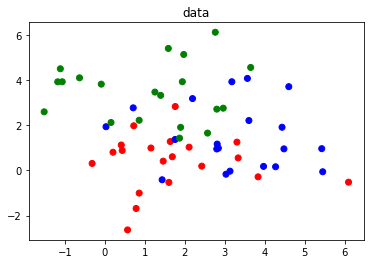

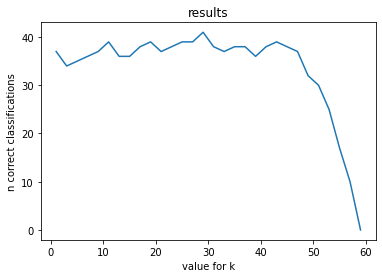

In [17]:
centers = [(1,1,'red'), (3,1,'blue'), (1,3,'green')]
data = make_data(centers, std=1.5)
plot_data(data)
ks, corr = run_test(data)
plot_test(ks, corr)